In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
column_names = ['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']
df1 = pd.read_csv('breast-cancer.data', header=None, names=column_names)

In [6]:
df1.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [7]:
def get_info_dataframe(dataframe):
    print(f"DATAFRAME GENERAL INFO - \n")
    print(dataframe.info(),"\n")
    print(f"DATAFRAME MISSING INFO - \n")
    print(dataframe.isnull().sum(),"\n")
    print(f"DATAFRAME SHAPE INFO - \n")
    print(dataframe.shape)

In [8]:
get_info_dataframe(df1)

DATAFRAME GENERAL INFO - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB
None 

DATAFRAME MISSING INFO - 

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64 

DATAFRAME SHAPE INFO - 

(286, 10)


In [9]:
categorical_columns = ['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat']
df = df1.copy()
for name in categorical_columns:
    df[name] = df[name].astype('category')
    df[name] = df[name].cat.codes

df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,1,2,5,0,1,3,0,2,0
1,0,2,2,3,0,1,2,1,5,0
2,0,2,2,3,0,1,2,0,2,0
3,0,4,0,2,0,1,2,1,3,0
4,0,2,2,0,0,1,2,1,4,0


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#split data
X = df.drop(['irradiat'], axis = 1).values
y = df['irradiat'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(200, 9)
(200,)
(86, 9)
(86,)


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [40]:
scaler = StandardScaler()

In [41]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [42]:
hiden_dim = 4

class NeuralNetworkClassificationModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(NeuralNetworkClassificationModel,self).__init__()
        self.input_layer    = nn.Linear(input_dim,hiden_dim)
        # self.hidden_layer1  = nn.Linear(10, 3)
        self.output_layer   = nn.Linear(hiden_dim,output_dim)
        # self.relu = nn.ReLU()
        # self.square = torch.square()
    
    
    def forward(self,x):
        out =  torch.square(self.input_layer(x))
        out =  torch.square(self.output_layer(out))
        # out =  torch.square(self.input_layer(x))
        # out =  self.output_layer(out)
        # out =  self.relu(self.hidden_layer1(out))
        return out

In [47]:
input_dim  = 9
output_dim = 2
model = NeuralNetworkClassificationModel(input_dim,output_dim)

# creating our optimizer and loss function object
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [48]:
def train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses):
    for epoch in range(num_epochs):
        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()
        
        #forward feed
        output_train = model(X_train)

        #calculate the loss
        loss_train = criterion(output_train, y_train)
        


        #backward propagation: calculate gradients
        loss_train.backward()

        #update the weights
        optimizer.step()

        
        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

In [49]:
num_epochs = 500
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [50]:
train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses)

Epoch 50/500, Train Loss: 0.7715, Test Loss: 0.7825
Epoch 100/500, Train Loss: 0.7004, Test Loss: 0.7626
Epoch 150/500, Train Loss: 0.6454, Test Loss: 0.7183
Epoch 200/500, Train Loss: 0.5555, Test Loss: 0.6700
Epoch 250/500, Train Loss: 0.5094, Test Loss: 0.6411
Epoch 300/500, Train Loss: 0.4941, Test Loss: 0.6135
Epoch 350/500, Train Loss: 0.4844, Test Loss: 0.6018
Epoch 400/500, Train Loss: 0.4761, Test Loss: 0.5948
Epoch 450/500, Train Loss: 0.4677, Test Loss: 0.5901
Epoch 500/500, Train Loss: 0.4582, Test Loss: 0.5875


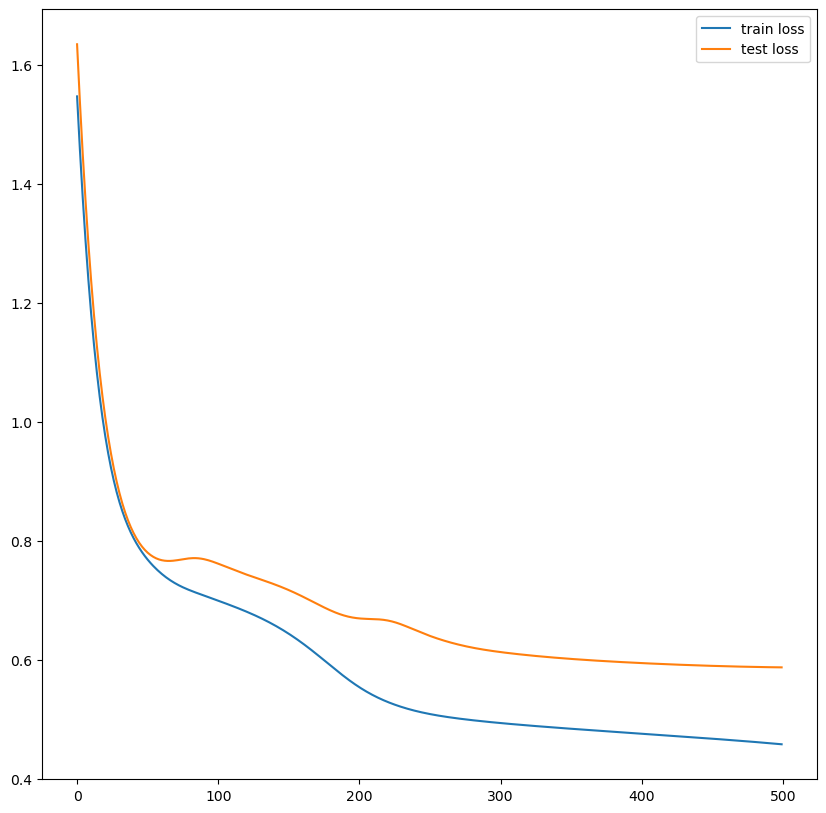

In [51]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [52]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

In [53]:
def get_accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []
    # we will get something like this in the pred_arr [32.1680,12.9350,-58.4877]
    # so will be taking the index of that argument which has the highest value here 32.1680 which corresponds to 0th index
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0
    #here we are doing a simple comparison between the predicted_arr and the original_arr to get the final accuracy
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

In [54]:
train_acc = get_accuracy_multiclass(predictions_train,y_train)
test_acc  = get_accuracy_multiclass(predictions_test,y_test)

In [55]:
print(f"Training Accuracy: {round(train_acc*100,3)}")
print(f"Test Accuracy: {round(test_acc*100,3)}")

Training Accuracy: 81.0
Test Accuracy: 76.744


In [56]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.1185,  0.3935,  0.2497, -0.1617, -0.2091,  0.2089, -0.1434,  0.1759,
           0.2378],
         [ 0.2226, -0.2014,  0.0651, -0.0543,  0.1452, -0.0518, -0.1694,  0.3284,
           0.3074],
         [-0.2236,  0.1168, -0.0711,  0.0827, -0.3883,  0.0021,  0.1468, -0.0358,
          -0.0871],
         [-0.2679,  0.3413,  0.1723,  0.1381,  0.0561,  0.0223,  0.1358,  0.0099,
          -0.1845]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0931, -0.3290, -0.2491,  0.3849], requires_grad=True),
 Parameter containing:
 tensor([[ 0.3538,  0.2375, -0.1650,  0.0827],
         [-0.3075,  0.2054,  0.3582, -0.1114]], requires_grad=True),
 Parameter containing:
 tensor([0.2990, 0.2810], requires_grad=True)]

In [57]:
# Get the model parameters
params = model.state_dict()

# Convert the parameter tensors into numpy arrays
param_arrays = []

# Save each parameter tensor to a separate CSV file
for key in params:
    param_array = params[key].cpu().numpy()
    np.savetxt(key+'.csv', param_array, delimiter=',', fmt="%.5f")

In [58]:
df = pd.DataFrame(X_test.numpy())

# Save DataFrame to CSV
df.to_csv('X_test.csv', index=False, header=False)

In [65]:
import pandas as pd
import numpy as np

x_test = pd.read_csv('X_test.csv', header=None).values
weight1 = pd.read_csv('input_layer.weight.csv', header=None).values
weight2 = pd.read_csv('output_layer.weight.csv', header=None).values
bias1 = pd.read_csv('input_layer.bias.csv', header=None).values
bias2 = pd.read_csv('output_layer.bias.csv', header=None).values
x = x_test[0]
x, weight1, weight2, bias1, bias2

(array([0., 4., 0., 3., 0., 1., 1., 0., 2.]),
 array([[-0.11848,  0.39345,  0.24968, -0.16174, -0.20913,  0.20888,
         -0.14336,  0.17586,  0.23776],
        [ 0.22259, -0.20141,  0.06514, -0.0543 ,  0.14522, -0.05184,
         -0.16943,  0.32842,  0.30742],
        [-0.22358,  0.11684, -0.07109,  0.08267, -0.38832,  0.00212,
          0.14676, -0.03576, -0.08708],
        [-0.26795,  0.34129,  0.17229,  0.13811,  0.05611,  0.02225,
          0.13578,  0.00991, -0.18448]]),
 array([[ 0.35377,  0.23751, -0.16502,  0.08274],
        [-0.30748,  0.20542,  0.35819, -0.11144]]),
 array([[ 0.0931 ],
        [-0.32901],
        [-0.24906],
        [ 0.38493]]),
 array([[0.29904],
        [0.28095]]))

In [70]:
scale = 2**20
x = x_test[0]
x_scale = np.round(x * scale)
weight1_scale = np.trunc(weight1 * scale)
weight2_scale = np.trunc(weight2 * scale)
bias1_scale = np.trunc(bias1 * scale) * scale
bias2_scale = np.trunc(bias2 * scale) * (scale**4)

x_scale, weight1_scale, weight2_scale, bias1_scale, bias2_scale

(array([      0., 4194304.,       0., 3145728.,       0., 1048576.,
        1048576.,       0., 2097152.]),
 array([[-124235.,  412562.,  261808., -169596., -219288.,  219026.,
         -150323.,  184402.,  249309.],
        [ 233402., -211193.,   68304.,  -56937.,  152274.,  -54358.,
         -177660.,  344373.,  322353.],
        [-234440.,  122515.,  -74543.,   86685., -407183.,    2222.,
          153889.,  -37497.,  -91309.],
        [-280965.,  357868.,  180659.,  144818.,   58835.,   23330.,
          142375.,   10391., -193441.]]),
 array([[ 370954.,  249047., -173036.,   86759.],
        [-322416.,  215398.,  375589., -116853.]]),
 array([[ 1.02364086e+11],
        [-3.61749283e+11],
        [-2.73844011e+11],
        [ 4.23234634e+11]]),
 array([[3.790780335532808e+29],
        [3.561459196810109e+29]], dtype=object))

In [71]:

v1 = np.matmul(weight1_scale, x_scale.T) + bias1_scale.T
v1 = np.square(v1)
v2 = np.matmul(weight2_scale, v1.T) + bias2_scale
v2_scale = np.square(v2)


v1 = np.matmul(weight1, x.T) + bias1.T
v1 = np.square(v1)
v2 = np.matmul(weight2, v1.T) + bias2
v2 = np.square(v2)
print(v2_scale)
print("error : ", v2_scale / scale**10 - v2)

[[5.361943890906589e+60]
 [1.0786910834752449e+60]]
error :  [[-2.3939443491993728e-05]
 [2.788057743563499e-07]]
